In the first notebook [notebook_01_webscraping_Evanescence_Within_Temptation.ipynb](http://localhost:8888/notebooks/Project_Evanescence_Within_Temptation/notebook_01_webscraping_Evanescence_Within_Temptation.ipynb) of this project we used web scrapping to obtain lyrics of `Evanescence` and `Within Temptation`. After that we used Spotify API to retrieve more details about both bands including information about them, their albums, and details about their lyrics including not only metadata (e.g. track_popularity, album_name ) but also audio features (e.g. valence, energy, tempo, liveness) [notebook_02_retrieve_Spotify_data-Evanescence_Within_Temptation.ipynb](http://localhost:8888/notebooks/Project_Evanescence_Within_Temptation/notebook_02_retrieve_Spotify_data-Evanescence_Within_Temptation.ipynb).

Now is time to use the data retrieved and try to explore and visualize as much as we can. Our goal is not only explore text data, but also visualize numeric and categorical features. 

In what concerns NLP (Natural Language Processing) I want to do some things:

1. **Text analysis:** Analyze both bands and compare them through their lyrics using some metrics and word clouds.
2. **Sentiment analysis:** Explore the sentiment, polarity, and subjectivity of the lyrics provided by [TextBlob](https://textblob.readthedocs.io/en/dev/index.html) to compare both bands through visualization.
3. **Metadatada analysis**: I'll try also to connect metadata of tracks with the sentiment provided by lyrics to draw conclusions.
4. **Audio feature's analysis:** Analyse some of the audio features, in special the ones that have been pointed as mood features, i.e., valence and energy, and see if there is a relation between them and the sentiment of lyrics of a track.

Let’s get started!

# **Load Packages**

In [24]:
import pandas as pd
import re
import unicodedata
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option("display.max_rows",200)


# **Load all data**

## Lyrics

Dataframes with lyrics are loaded here.

In [142]:
df_lyrics_evanescence = pd.read_csv("./data/lyrics_evanescence_2020-02-16.csv")
df_lyrics_evanescence.sort_values(by='song_title')

,song_title,lyrics
51,4th of july,Shower in the dark day. Clean sparks driving d...
24,all that im living for,All that I'm living for. All that I'm dying fo...
60,angel of mine,You are everything I need to see. Smile and su...
15,anything for you,I'd give anything to give me to you. Can you f...
67,anywhere,"Dear my love, haven't you wanted to be with me..."
19,away from me,I hold my breath. as this life starts to take ...
41,before the dawn,Meet me after dark again. and I'll hold you. I...
17,bleed,How can I pretend that I don't see. What you h...
36,breathe no more,I've been looking in the mirror for so long.. ...
7,bring me to life,how can you see into my eyes. like open doors....


In [3]:
df_lyrics_evanescence.shape

(86, 2)

In [4]:
df_lyrics_within_temptation = pd.read_csv("./data/lyrics_within_temptation_2020-02-16.csv")
df_lyrics_within_temptation.sort_values(by='song_title').head(15)

,song_title,lyrics
42,a dangerous mind,Cause something is not right. I follow the sig...
40,a demons fate,"Ooh, ooh, ooh, ooh, ooh. Ooh, ooh, ooh, ooh, o..."
2,all i need,I'm dying to catch my breath. Oh why don't I e...
52,angels,Sparkling angel I believed. You were my saviou...
16,another day,I know you are going away. I take my love into...
71,aquarius,I hear your whispers. Break the silence and it...
26,bittersweet,If I tell you. Will you listen?. Will you stay...
43,blue eyes,Blue eyes wide to the world. Full of dreams an...
53,caged,These are the darkest clouds. They have surrou...
58,candles,Take away. These hands of darkness. Reaching f...


In [5]:
df_lyrics_within_temptation.shape

(74, 2)

## Spotify's data

From all the data retrieved I'll concentrate on the track's information csv. I'll load the .csv that has already some duplicates eliminated.

### Evanescence

In [95]:
df_tracks_evanescence = pd.read_csv("./data/info_tracks_evanescence_without_duplicates_2020-02-16.csv")

In [96]:
df_tracks_evanescence.shape

(85, 19)

In [97]:
df_tracks_evanescence.sort_values(by=['track_name','track_popularity'])

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
51,Evanescence (Deluxe Version),2011-01-01,2011,3UkDyGtriDY7NzOJbF0rIH,a new way to bleed,226400,44,NaN,0.378,0.8950,1,-4.347,1,0.0531,0.000050,0.025200,0.1500,0.2580,155.946
37,The Open Door,2006-01-01,2006,4iDQezFTnOwgnrPYiqQ6TP,all that i am living for,228706,48,NaN,0.514,0.8090,3,-4.396,0,0.0617,0.012100,0.000000,0.0763,0.3850,136.881
58,Lost Whispers,2016-01-01,2016,2lH8hMXxuIcjpbIok9KbUj,breathe no more b side version,228809,49,NaN,0.620,0.1860,11,-8.527,0,0.0284,0.971000,0.000001,0.1170,0.2190,96.992
19,Anywhere But Home (Live),2004-01-01,2004,2zn4moJkEmIVfV83iye9t5,"breathe no more live from le zénith,france/2004",213853,33,NaN,0.562,0.4310,11,-10.670,0,0.0307,0.323000,0.018500,0.9550,0.1670,108.012
1,Fallen,2003-01-01,2003,0COqiPhxzoWICwFCS4eZcp,bring me to life,235893,77,NaN,0.331,0.9430,4,-3.188,0,0.0698,0.007210,0.000002,0.2420,0.2960,94.612
73,Synthesis Live,2018-12-14,2018,1rvxZ0qg96Nkr3PLhHTbCA,bring me to life live,264026,29,https://p.scdn.co/mp3-preview/87cbd661e1853b8f...,0.149,0.8130,4,-5.260,0,0.0560,0.346000,0.000021,0.9140,0.2420,90.642
21,Anywhere But Home (Live),2004-01-01,2004,1AjCrY9w0edn2jAGEAkzJ7,"bring me to life live from le zénith,france/...",283760,40,NaN,0.341,0.8250,4,-7.220,0,0.0622,0.022100,0.030600,0.5220,0.0398,94.992
64,Synthesis,2017-11-08,2017,4vHFFk4Vm9NWhGq2FAsTlj,bring me to life synthesis,257320,6,NaN,0.362,0.7850,4,-3.876,0,0.0567,0.610000,0.000001,0.0722,0.1600,90.904
27,The Open Door,2006-01-01,2006,663Karu2rvKLdnY0eo1n3M,call me when you're sober,214706,64,NaN,0.450,0.8830,7,-4.094,1,0.0524,0.001930,0.000000,0.2930,0.3280,93.410
30,The Open Door,2006-01-01,2006,6Sh05fnlrLbMfSuI8Qur6a,cloud nine,262173,44,NaN,0.125,0.8930,3,-4.217,0,0.2100,0.043200,0.000085,0.1510,0.1900,194.550


The dataframe above give us information of 85 tracks. However, by organizing dataframe by `track_name` we can see that there are different versions of the same song, e.g., `breathe no more b side version` and `breathe no more live from le zénith,france/2004`.

We need to find a way to keep only one version of each and in a way that will be easier to merge with lyrics information.

For what I observed, 3 songs I need to rename before I drop rows which track_name has 'live' or 'band version'.

In [98]:
# to see better how the names are written and be able to use in the following part
track_name_list = df_tracks_evanescence['track_name'].tolist()
track_name_list.sort()
track_name_list

['a new way to bleed',
 'all that i am living for',
 'breathe no more   b side version',
 'breathe no more   live from le zénith,france/2004',
 'bring me to life',
 'bring me to life   live',
 'bring me to life   live from le zénith,france/2004',
 'bring me to life   synthesis',
 "call me when you're sober",
 'cloud nine',
 'disappear',
 'erase this',
 'even in death   2016 version',
 "everybody's fool",
 "everybody's fool   live from le zénith,france/2004",
 'farther away',
 'farther away   live from le zénith,france/2004',
 'going under',
 'going under   live from le zénith,france/2004',
 'good enough',
 'good enough   live',
 'haunted',
 'haunted   live from le zénith,france/2004',
 'hello',
 'hi lo',
 'hi lo   live',
 'if you don’t mind',
 'imaginary',
 'imaginary   live from le zénith,france/2004',
 'imperfection',
 'lacrymosa',
 'lacrymosa   live',
 'like you',
 'lithium',
 'lithium   live',
 'lose control',
 'lost in paradise',
 'lost in paradise   live',
 'lost whispers   intro

In [99]:
tracks_to_rename = ['breathe no more   b side version', 'even in death   2016 version', 'thoughtless   live from le zénith,france/2004', 'lost whispers   intro', 'the in between   piano solo']

In [100]:
df_tracks_evanescence_clean = df_tracks_evanescence.copy()

Renaming some tracks.

In [101]:
df_tracks_evanescence_clean['track_name'][df_tracks_evanescence_clean['track_name']
                                          =='breathe no more   b side version']='breathe no more'

df_tracks_evanescence_clean['track_name'][df_tracks_evanescence_clean['track_name']
                                          =='even in death   2016 version']='even in death'

df_tracks_evanescence_clean['track_name'][df_tracks_evanescence_clean['track_name']
                                          =='thoughtless   live from le zénith,france/2004']='thoughtless'

df_tracks_evanescence_clean['track_name'][df_tracks_evanescence_clean['track_name']
                                          =='lost whispers   intro']='lost whispers'

df_tracks_evanescence_clean['track_name'][df_tracks_evanescence_clean['track_name']
                                          =='the in between   piano solo']='the in between'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning

Eliminating `track_name` that have `live`, `band version`, and `synthesis`.

In [103]:
to_drop = ['live','band version','synthesis']

pattern = '|'.join(to_drop)
pattern

'live|band version|synthesis'

In [104]:
index_to_remove = df_tracks_evanescence_clean[df_tracks_evanescence_clean['track_name'].str.contains(pattern)].index

In [105]:
# Delete these row indexes from dataFrame
df_tracks_evanescence_clean = df_tracks_evanescence_clean.drop(index_to_remove)
df_tracks_evanescence_clean.reset_index(drop=True,inplace = True)
df_tracks_evanescence_clean.head()

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Fallen,2003-01-01,2003,3UygY7qW2cvG9Llkay6i1i,going under,214946,68,NaN,0.370,0.858,11,-4.885,0,0.0545,0.00815,0.000021,0.229,0.464,175.077
1,Fallen,2003-01-01,2003,0COqiPhxzoWICwFCS4eZcp,bring me to life,235893,77,NaN,0.331,0.943,4,-3.188,0,0.0698,0.00721,0.000002,0.242,0.296,94.612
2,Fallen,2003-01-01,2003,0tWEB6BxbI48XN79QE1JbT,everybody's fool,195880,62,NaN,0.437,0.835,2,-5.076,0,0.0405,0.00145,0.000023,0.245,0.296,95.111
3,Fallen,2003-01-01,2003,4UzVcXufOhGUwF56HT7b8M,my immortal,262533,73,NaN,0.190,0.265,9,-9.206,1,0.0356,0.86300,0.000000,0.134,0.101,79.012
4,Fallen,2003-01-01,2003,6Z77oDcn6iI1MHFCBPjl24,haunted,185440,54,NaN,0.364,0.861,4,-4.588,0,0.0617,0.00959,0.004490,0.107,0.160,155.672


In [106]:
df_tracks_evanescence_clean.shape

(55, 19)

Removing some different versions of songs to avoid duplicates, we keep at the end 56 tracks. It is important to notice that audio features and duration will differ between different versions of the same song, e.g., live version and studio version. However, we are interested now in making analysis related to lyrics. Therefore, diference between versions are not our focus at this moment.

### Within Temptation

In [118]:
df_tracks_within_temptation = pd.read_csv("./data/info_tracks_within_temptation_without_duplicates_2020-02-16.csv")

In [119]:
df_tracks_within_temptation.shape

(165, 19)

In [120]:
df_tracks_within_temptation.sort_values(by=['track_name','track_popularity'])

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
32,The Silent Force,2004-11-15,2004,6D5ih8y9mKmCSkuZO2Up2Q,a dangerous mind,256533,34,https://p.scdn.co/mp3-preview/c2c47b037fe1394c...,0.365,0.894,6,-5.491,0,0.0727,0.071100,0.000378,0.1350,0.4760,180.200
75,The Unforgiving,2011-03-25,2011,6ivwIJGFnzTRPG2dHvKA07,a demon's fate,329537,40,https://p.scdn.co/mp3-preview/cd99a3cda30d3714...,0.460,0.912,5,-3.444,0,0.0596,0.000579,0.000217,0.1040,0.3110,134.074
42,The Heart Of Everything,2007-11-09,2007,0lW4J9tzxpODQ8IExSumDW,all i need,290946,24,https://p.scdn.co/mp3-preview/15ddd25586b4f62e...,0.233,0.730,10,-4.855,1,0.0449,0.201000,0.000004,0.1300,0.1230,152.972
55,An Acoustic Night At The Theatre,2009-11-02,2009,1tbSP6d2KwBB2DZUJLalRZ,all i need live,320946,21,https://p.scdn.co/mp3-preview/eae98f3734badfd0...,0.368,0.674,7,-5.859,0,0.0328,0.424000,0.000000,0.9510,0.1240,149.204
91,Hydra (Special Edition),2014-02-04,2014,6MubsJeQrVa0k7lJSxcdaM,and we run,230067,7,https://p.scdn.co/mp3-preview/af524142f40dcacf...,0.544,0.837,6,-4.618,0,0.0465,0.059600,0.000000,0.0698,0.1590,128.980
99,Hydra (Special Edition),2014-02-04,2014,13cZ2hORsadxvc2KLUBZoA,and we run evolution track,341497,5,https://p.scdn.co/mp3-preview/fc476336bac928d0...,0.578,0.723,6,-7.949,0,0.0507,0.136000,0.000002,0.1960,0.1650,129.054
131,Let Us Burn - Elements & Hydra Live In Concert,2014-11-12,2014,301osYEEEVs4EQNXZXStCi,and we run live 2014,236746,0,https://p.scdn.co/mp3-preview/3789af5d464b633f...,0.510,0.865,9,-4.793,1,0.0431,0.190000,0.000031,0.6790,0.4510,129.013
27,The Silent Force,2004-11-15,2004,3TEwbiC0GhIRStn3Eabtu7,angels,240440,55,https://p.scdn.co/mp3-preview/1dbf69a32db3b4d2...,0.341,0.867,7,-4.727,0,0.0492,0.293000,0.000000,0.2570,0.2000,182.023
114,Let Us Burn - Elements & Hydra Live In Concert,2014-11-12,2014,6oQdvGElasxvHYutiewDSc,angels live 2012,252226,0,https://p.scdn.co/mp3-preview/9f9cc354c35bf303...,0.438,0.852,7,-5.567,0,0.0387,0.147000,0.000000,0.9760,0.2460,91.061
105,Enter + The Dance,2014-10-11,2014,4nroowkyOM1HB9BOwUVV3M,another day,348453,16,https://p.scdn.co/mp3-preview/f76426030a7cfb44...,0.150,0.637,10,-6.177,1,0.0344,0.000843,0.003020,0.3570,0.1740,150.038


Also, we observe made different versions for Within Temptation's songs. Then, as for Evanescence we will eliminate them trying to keep only one version of each.

In [121]:
# to see better how the names are written and be able to use in the following part
track_name_list = df_tracks_within_temptation['track_name'].tolist()
track_name_list.sort()
track_name_list

['a dangerous mind',
 "a demon's fate",
 'all i need',
 'all i need   live',
 'and we run',
 'and we run   evolution track',
 'and we run   live 2014',
 'angels',
 'angels   live 2012',
 'another day',
 'apologize',
 'aquarius',
 'behind blue eyes',
 'blooded',
 'caged',
 'caged   live',
 'caged (live)',
 'candles',
 'candles   live 2012',
 'candles & pearls of light   remix',
 'candles (live)',
 'covered by roses',
 'covered by roses   evolution track',
 'covered by roses   live 2014',
 'crazy',
 'dangerous',
 'dangerous   live 2014',
 'dark wings',
 'deceiver of fools',
 'deceiver of fools (live)',
 'deep within',
 'dirty dancer',
 'dog days',
 "don't you worry child",
 'edge of the world',
 'edge of the world   live 2014',
 'endless war',
 'endless war   instrumental',
 'endless war   single edit',
 'enter',
 'faster',
 'faster   live 2012',
 'faster   live 2014',
 'final destination',
 'fire and ice',
 'fire and ice   live 2012',
 'firelight',
 'firelight   instrumental',
 'firelig

In [122]:
df_tracks_within_temptation_clean = df_tracks_within_temptation.copy()

In [123]:
to_drop = ['live', 'evolution track', 'remix', 'nstrumental', 'single edit', 'acoustic', 'demo version', 'rock mix', 'pop mix','the gatekeeper']

pattern = '|'.join(to_drop)
pattern

'live|evolution track|remix|nstrumental|single edit|acoustic|demo version|rock mix|pop mix|the gatekeeper'

In [124]:
index_to_remove = df_tracks_within_temptation_clean[df_tracks_within_temptation_clean['track_name'].str.contains(pattern)].index
index_to_remove

Int64Index([ 18,  19,  20,  21,  30,  45,  46,  47,  48,  49,  52,  53,  54,
             55,  56,  57,  58,  59,  60,  61,  62,  99, 100, 101, 102, 103,
            106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
            119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
            132, 133, 134, 135, 136, 137, 138, 139, 150, 151, 152, 153, 154,
            155, 156, 157, 158, 159, 160, 161, 162, 163, 164],
           dtype='int64')

In [125]:
# Delete these row indexes from dataFrame
df_tracks_within_temptation_clean = df_tracks_within_temptation_clean.drop(index_to_remove)
df_tracks_within_temptation_clean.reset_index(drop=True,inplace = True)
df_tracks_within_temptation_clean.head()

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Enter,1997-04-06,1997,6yOA6NAk0fEkWQqC978YH9,restless,368026,36,https://p.scdn.co/mp3-preview/bf3243dc56c61d0f...,0.526,0.650,0,-8.221,0,0.0284,0.000497,0.000206,0.2200,0.0664,117.947
1,Enter,1997-04-06,1997,1yKW3AnE8R6aAy98WBr4Hz,enter,434613,34,https://p.scdn.co/mp3-preview/2878276ec0c5aecf...,0.466,0.712,7,-7.225,0,0.0345,0.000021,0.018300,0.4320,0.1480,110.740
2,Enter,1997-04-06,1997,4l11flUAof8YYKPGjKjAVd,pearls of light,314600,24,https://p.scdn.co/mp3-preview/641fa32ef859657c...,0.388,0.647,2,-6.804,0,0.0281,0.001410,0.067300,0.0891,0.0377,107.830
3,Enter,1997-04-06,1997,0naAw7isodSoXESRN3CIMv,deep within,270160,23,https://p.scdn.co/mp3-preview/c063381d178307af...,0.522,0.896,7,-7.532,1,0.0307,0.000006,0.886000,0.1100,0.4390,114.783
4,Enter,1997-04-06,1997,3uNvjXzIedlYI98Ims9GfZ,gatekeeper,403160,23,https://p.scdn.co/mp3-preview/66305ed15b77e912...,0.152,0.790,0,-7.131,1,0.0425,0.000018,0.823000,0.2320,0.0398,165.035


In [126]:
df_tracks_within_temptation_clean.shape

(90, 19)

After filtering out different versions of same songs we kept 91 of the 165 songs.

There were some songs with '(' and '). And a song with acent (Sinèad). Before merging I'll remove these. In addition, it can be noticed is that the song's titles of lyrics data have no " ' ", while the tracks's names from Spotify have. E.g.: song_title: call me when youre sober x track_name: call me when you're sober.

So I'll remove " ' " from all track_name.

## Cleaning song_title and track_name

In [127]:
def remove_accented_chars(text):
    """ remove accents"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def removebrackets(text):
    """ remove brackets """
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def clean_text(text):
    
    cleaned_text = text.apply(lambda x: removebrackets(x))
    cleaned_text = cleaned_text.apply(lambda x: remove_accented_chars(x))
    cleaned_text = cleaned_text.apply(lambda x: remove_special_chars(x))
    # lowercase
    cleaned_text = cleaned_text.apply(lambda x: x.lower())
    
    return cleaned_text

Just to be sure I'll be sure I'll apply also to song_title of lyrics dataframes.

In [128]:
df_tracks_evanescence_clean["track_name"] = clean_text(df_tracks_evanescence_clean["track_name"])
df_tracks_within_temptation_clean["track_name"] = clean_text(df_tracks_within_temptation_clean["track_name"])

df_lyrics_evanescence["song_title"] = clean_text(df_lyrics_evanescence["song_title"])
df_lyrics_within_temptation["song_title"] = clean_text(df_lyrics_within_temptation["song_title"])

# remove eventual extra spaces in de begin or end of lyric/track name

df_tracks_evanescence_clean["track_name"] = df_tracks_evanescence_clean["track_name"].apply(lambda x: x.strip())
df_tracks_within_temptation_clean["track_name"] = df_tracks_within_temptation_clean["track_name"].apply(lambda x: x.strip())

df_lyrics_evanescence["song_title"] = df_lyrics_evanescence["song_title"].apply(lambda x: x.strip())
df_lyrics_within_temptation["song_title"] = df_lyrics_within_temptation["song_title"].apply(lambda x: x.strip())

# **Merge lyrics data with Spotify's data**

Now is time to merge lyrics' dataframe and tracks' dataframe, and see for how many songs we can have both lyrics and track's information.

## Evanescence

In [138]:
df_evanescence_merged = df_lyrics_evanescence.merge(df_tracks_evanescence_clean, left_on='song_title', right_on='track_name')

df_evanescence_merged.head()

,song_title,lyrics,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,haunted,long lost words whisper slowly to me. still ca...,Fallen,2003-01-01,2003,6Z77oDcn6iI1MHFCBPjl24,haunted,185440,54,NaN,...,0.861,4,-4.588,0,0.0617,0.009590,0.004490,0.1070,0.160,155.672
1,my immortal,I'm so tired of being here. suppressed by all ...,Fallen,2003-01-01,2003,4UzVcXufOhGUwF56HT7b8M,my immortal,262533,73,NaN,...,0.265,9,-9.206,1,0.0356,0.863000,0.000000,0.1340,0.101,79.012
2,snow white queen,"Stop right, lock the door. Don't look back. Un...",The Open Door,2006-01-01,2006,7uCzFZHGoVPlINC4fR24gV,snow white queen,262733,44,NaN,...,0.835,9,-5.520,0,0.0737,0.041100,0.000011,0.0914,0.267,132.004
3,weight of the world,Feels like the weight of the world. Like God i...,The Open Door,2006-01-01,2006,1UfCIFhRr8Bci9LUJ68dvp,weight of the world,217960,48,NaN,...,0.949,8,-3.941,1,0.1320,0.000852,0.000831,0.1310,0.390,140.145
4,bring me to life,how can you see into my eyes. like open doors....,Fallen,2003-01-01,2003,0COqiPhxzoWICwFCS4eZcp,bring me to life,235893,77,NaN,...,0.943,4,-3.188,0,0.0698,0.007210,0.000002,0.2420,0.296,94.612


In [135]:
df_evanescence_merged.shape

(44, 21)

In [136]:
df_evanescence_merged.shape[0]/df_lyrics_evanescence.shape[0]

0.5116279069767442

We succeeded in having all information (lyrics, metadatada, and audio features) for 44 songs by merging our dataframes. This means that 51.16% of the `Evanescence's songs` for which we retrieved lyrics.

In [143]:
list_songs_evanescence_merged = df_evanescence_merged['song_title'].tolist()
list_songs_evanescence_merged.sort()
list_songs_evanescence_merged

['breathe no more',
 'bring me to life',
 'call me when youre sober',
 'cloud nine',
 'disappear',
 'erase this',
 'even in death',
 'everybodys fool',
 'farther away',
 'going under',
 'good enough',
 'haunted',
 'hello',
 'imaginary',
 'imperfection',
 'lacrymosa',
 'like you',
 'lithium',
 'lose control',
 'lost in paradise',
 'made of stone',
 'missing',
 'my heart is broken',
 'my immortal',
 'my last breath',
 'never go back',
 'say you will',
 'secret door',
 'sick',
 'snow white queen',
 'sweet sacrifice',
 'swimming home',
 'taking over me',
 'the change',
 'the last song im wasting on you',
 'the only one',
 'the other side',
 'thoughtless',
 'together again',
 'tourniquet',
 'weight of the world',
 'what you want',
 'whisper',
 'your star']

## Within Temptation

In [144]:
df_within_temptation_merged = df_lyrics_within_temptation.merge(df_tracks_within_temptation_clean, left_on='song_title', right_on='track_name')
df_within_temptation_merged.head()

,song_title,lyrics,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,stand my ground,I can see. When you stay low nothing happens. ...,The Silent Force,2004-11-15,2004,15z9QEJOBV6hDdWsdZwDKP,stand my ground,267986,55,https://p.scdn.co/mp3-preview/86774c051d057643...,...,0.866,5,-4.072,0,0.0503,0.049400,0.000873,0.116,0.129,87.714
1,all i need,I'm dying to catch my breath. Oh why don't I e...,The Heart Of Everything,2007-11-09,2007,0lW4J9tzxpODQ8IExSumDW,all i need,290946,24,https://p.scdn.co/mp3-preview/15ddd25586b4f62e...,...,0.730,10,-4.855,1,0.0449,0.201000,0.000004,0.130,0.123,152.972
2,forgiven,Love you so it hurts my soul. Can you forgive ...,The Heart Of Everything,2007-11-09,2007,3diWdX9Upe8r0EPjoKBLmx,forgiven,292066,24,https://p.scdn.co/mp3-preview/7a2686a9a5e1999f...,...,0.342,7,-8.933,0,0.0298,0.932000,0.000816,0.135,0.172,99.888
3,iron,"Left in the darkness, here on your own. Woke u...",The Unforgiving,2011-03-25,2011,1JVF9NpxbaonRnkahl21HB,iron,339940,42,https://p.scdn.co/mp3-preview/ac09bd6eafc2e5a1...,...,0.962,11,-2.981,0,0.1210,0.000034,0.000015,0.368,0.270,198.134
4,why not me,Some may call it a curse. A life like mine. Bu...,The Unforgiving,2011-03-25,2011,412uQRVrDPisHPD6QHsRoN,why not me,34226,31,https://p.scdn.co/mp3-preview/d0266f992001d8a0...,...,0.441,2,-11.715,1,0.1060,0.115000,0.000162,0.628,0.309,98.102


In [145]:
df_within_temptation_merged.shape

(54, 21)

In [146]:
df_within_temptation_merged.shape[0]/df_lyrics_within_temptation.shape[0]

0.7297297297297297

In the case of `Within Temptation`, we got complete information about 72.9% of the songs for which we have lyrics.

In [147]:
list_songs_within_temptation_merged = df_within_temptation_merged['song_title'].tolist()
list_songs_within_temptation_merged.sort()
list_songs_within_temptation_merged

['a dangerous mind',
 'a demons fate',
 'all i need',
 'angels',
 'another day',
 'aquarius',
 'caged',
 'candles',
 'dark wings',
 'deceiver of fools',
 'deep within',
 'edge of the world',
 'enter',
 'faster',
 'final destination',
 'fire and ice',
 'forgiven',
 'forsaken',
 'frozen',
 'grace',
 'hand of sorrow',
 'ice queen',
 'in perfect harmony',
 'in the middle of the night',
 'iron',
 'jillian',
 'lost',
 'memories',
 'mother earth',
 'murder',
 'never ending story',
 'our farewell',
 'our solemn hour',
 'pale',
 'pearls of light',
 'raise your banner',
 'restless',
 'see who i am',
 'shot in the dark',
 'sinead',
 'somewhere',
 'stairway to the skies',
 'stand my ground',
 'the cross',
 'the dance',
 'the heart of everything',
 'the howling',
 'the last dance',
 'the promise',
 'the swan song',
 'the truth beneath the rose',
 'what have you done',
 'where is the edge',
 'why not me']

# Lyrics' Analysis

I'll use the lyrics resulting in mergin lyrics information with tracks information for analysis. At this part the greater focus will be in lyrics.

In this part I will perform the following steps:

1. Clean `lyrics` and save the result in a new column `lyrics_clean`.
2. Apply [TextBlob](https://textblob.readthedocs.io/en/dev/index.html) and create columns with the sentiment property information (`polarity` and `subjectivity`). The polarity score is a float within the range [-1.0, 1.0] where -1.0 is very positive, 0 is neutral, and 1 is very positive. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
3. Use polarity to define a lyric as positive or negative. This information will be in a binary column `is_positive` where `1` indicates a positive lyric and `0` a negative one.
4. Create feature `lyrics_len` with the lenght of the lyric.
5. Create feature `num_words` with lyric's number of words.
6. Create feature `lexicalrichness` 
6. Build word clouds
7. Build some graphs using [Plotly’s Python graphing library](https://plot.ly/python/).


## Some cleaning

There are some nice word clouds in R that I wanted to include in this project and in fact I have already something which is included in [GitHub](https://github.com/dpbac/evanescence_and_within_temptation_in_R).

For the R project my intention was to use the original lyrics csv that we have just loaded. However, when developing the R word cloud part some strange characters showed up and although I've tried some R option to try to clean there was no effect. So, I came back to Python and I decided to apply the following line of code:

        unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

found at https://github.com/kaparker/gameofthrones-wordclouds/blob/master/gotwordcloud.py which just fine worked fine.

The following function includes some basic cleaning. If you need more cleaning the code presented at https://github.com/kaparker/gameofthrones-wordclouds/blob/master/gotwordcloud.py can be very useful. 

In the previous section we have already introduced a cleaning function that will also be used here when cleaning lyrics.

In [148]:
def remove_stopwords(text, language = 'english'):
    """ remove stopwords """
    stopword_list = stopwords.words(language)
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])



In [150]:
# clean lyrics
df_evanescence_merged['lyrics_clean'] = clean_text(df_evanescence_merged['lyrics'])
# lowercase
df_evanescence_merged['lyrics_clean'] = df_evanescence_merged['lyrics_clean'].apply(lambda x: x.lower())
# remove stop words
df_evanescence_merged['lyrics_clean'] = df_evanescence_merged['lyrics_clean'].apply(lambda x: remove_stopwords(x))

df_evanescence_merged.head()

,song_title,lyrics,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics_clean
0,haunted,long lost words whisper slowly to me. still ca...,Fallen,2003-01-01,2003,6Z77oDcn6iI1MHFCBPjl24,haunted,185440,54,NaN,...,4,-4.588,0,0.0617,0.009590,0.004490,0.1070,0.160,155.672,long lost words whisper slowly still cant find...
1,my immortal,I'm so tired of being here. suppressed by all ...,Fallen,2003-01-01,2003,4UzVcXufOhGUwF56HT7b8M,my immortal,262533,73,NaN,...,9,-9.206,1,0.0356,0.863000,0.000000,0.1340,0.101,79.012,im tired suppressed childish fears leave wish ...
2,snow white queen,"Stop right, lock the door. Don't look back. Un...",The Open Door,2006-01-01,2006,7uCzFZHGoVPlINC4fR24gV,snow white queen,262733,44,NaN,...,9,-5.520,0,0.0737,0.041100,0.000011,0.0914,0.267,132.004,stop right lock door dont look back undress da...
3,weight of the world,Feels like the weight of the world. Like God i...,The Open Door,2006-01-01,2006,1UfCIFhRr8Bci9LUJ68dvp,weight of the world,217960,48,NaN,...,8,-3.941,1,0.1320,0.000852,0.000831,0.1310,0.390,140.145,feels like weight world like god heaven gave t...
4,bring me to life,how can you see into my eyes. like open doors....,Fallen,2003-01-01,2003,0COqiPhxzoWICwFCS4eZcp,bring me to life,235893,77,NaN,...,4,-3.188,0,0.0698,0.007210,0.000002,0.2420,0.296,94.612,see eyes like open doors leading core ive beco...


In [152]:
# clean lyrics
df_within_temptation_merged['lyrics_clean'] = clean_text(df_within_temptation_merged['lyrics'])
# lowercase
df_within_temptation_merged['lyrics_clean'] = df_within_temptation_merged['lyrics_clean'].apply(lambda x: x.lower())
# remove stop words
df_within_temptation_merged['lyrics_clean'] = df_within_temptation_merged['lyrics_clean'].apply(lambda x: remove_stopwords(x))

df_within_temptation_merged.head()

,song_title,lyrics,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics_clean
0,stand my ground,I can see. When you stay low nothing happens. ...,The Silent Force,2004-11-15,2004,15z9QEJOBV6hDdWsdZwDKP,stand my ground,267986,55,https://p.scdn.co/mp3-preview/86774c051d057643...,...,5,-4.072,0,0.0503,0.049400,0.000873,0.116,0.129,87.714,see stay low nothing happens feel right late n...
1,all i need,I'm dying to catch my breath. Oh why don't I e...,The Heart Of Everything,2007-11-09,2007,0lW4J9tzxpODQ8IExSumDW,all i need,290946,24,https://p.scdn.co/mp3-preview/15ddd25586b4f62e...,...,10,-4.855,1,0.0449,0.201000,0.000004,0.130,0.123,152.972,im dying catch breath oh dont ever learn ive l...
2,forgiven,Love you so it hurts my soul. Can you forgive ...,The Heart Of Everything,2007-11-09,2007,3diWdX9Upe8r0EPjoKBLmx,forgiven,292066,24,https://p.scdn.co/mp3-preview/7a2686a9a5e1999f...,...,7,-8.933,0,0.0298,0.932000,0.000816,0.135,0.172,99.888,love hurts soul forgive trying silence makes h...
3,iron,"Left in the darkness, here on your own. Woke u...",The Unforgiving,2011-03-25,2011,1JVF9NpxbaonRnkahl21HB,iron,339940,42,https://p.scdn.co/mp3-preview/ac09bd6eafc2e5a1...,...,11,-2.981,0,0.1210,0.000034,0.000015,0.368,0.270,198.134,left darkness woke memory feeling pain deny th...
4,why not me,Some may call it a curse. A life like mine. Bu...,The Unforgiving,2011-03-25,2011,412uQRVrDPisHPD6QHsRoN,why not me,34226,31,https://p.scdn.co/mp3-preview/d0266f992001d8a0...,...,2,-11.715,1,0.1060,0.115000,0.000162,0.628,0.309,98.102,may call curse life like mine others blessing ...


## Adding sentiment measures

In [154]:
def calculate_sentiment(text):
    """ 
    Calculate sentiment measures: polarity and subjectivity of a text.
    """
    sent = TextBlob(text).sentiment
    polarity = round(sent[0],3)
    subjectivity = round(sent[1],3)
    
    return (polarity, subjectivity)
    

In [155]:
# Adding polarity and subjectivity of lyrics
df_evanescence_merged['polarity'] = df_evanescence_merged['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[0])
df_evanescence_merged['subjectivity'] = df_evanescence_merged['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[1])

# Adding column that indicates if a lyric has a positive (1) or negative (0) sentiment based on polarity
df_evanescence_merged['is_positive'] = df_evanescence_merged['polarity'].apply(lambda x: 1 if x > 0 else 0)

In [156]:
# Adding polarity and subjectivity of lyrics
df_within_temptation_merged['polarity'] = df_within_temptation_merged['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[0])
df_within_temptation_merged['subjectivity'] = df_within_temptation_merged['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[1])

# Adding column that indicates if a lyric has a positive (1) or negative (0) sentiment based on polarity
df_within_temptation_merged['is_positive'] = df_within_temptation_merged['polarity'].apply(lambda x: 1 if x > 0 else 0)

## Lyrics lenght and word counts

In [157]:
df_evanescence_merged['lyric_len'] = df_evanescence_merged['lyrics_clean'].astype(str).apply(len)
df_evanescence_merged['word_count'] = df_evanescence_merged['lyrics_clean'].apply(lambda x: len(str(x).split()))

df_within_temptation_merged['lyric_len'] = df_within_temptation_merged['lyrics_clean'].astype(str).apply(len)
df_within_temptation_merged['word_count'] = df_within_temptation_merged['lyrics_clean'].apply(lambda x: len(str(x).split()))

In [158]:
df_evanescence_merged.head()

,song_title,lyrics,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,...,instrumentalness,liveness,valence,tempo,lyrics_clean,polarity,subjectivity,is_positive,lyric_len,word_count
0,haunted,long lost words whisper slowly to me. still ca...,Fallen,2003-01-01,2003,6Z77oDcn6iI1MHFCBPjl24,haunted,185440,54,NaN,...,0.004490,0.1070,0.160,155.672,long lost words whisper slowly still cant find...,0.050,0.440,1,238,38
1,my immortal,I'm so tired of being here. suppressed by all ...,Fallen,2003-01-01,2003,4UzVcXufOhGUwF56HT7b8M,my immortal,262533,73,NaN,...,0.000000,0.1340,0.101,79.012,im tired suppressed childish fears leave wish ...,0.058,0.492,1,639,113
2,snow white queen,"Stop right, lock the door. Don't look back. Un...",The Open Door,2006-01-01,2006,7uCzFZHGoVPlINC4fR24gV,snow white queen,262733,44,NaN,...,0.000011,0.0914,0.267,132.004,stop right lock door dont look back undress da...,0.114,0.374,1,704,123
3,weight of the world,Feels like the weight of the world. Like God i...,The Open Door,2006-01-01,2006,1UfCIFhRr8Bci9LUJ68dvp,weight of the world,217960,48,NaN,...,0.000831,0.1310,0.390,140.145,feels like weight world like god heaven gave t...,0.240,0.500,1,290,52
4,bring me to life,how can you see into my eyes. like open doors....,Fallen,2003-01-01,2003,0COqiPhxzoWICwFCS4eZcp,bring me to life,235893,77,NaN,...,0.000002,0.2420,0.296,94.612,see eyes like open doors leading core ive beco...,-0.108,0.492,0,766,131


In [159]:
df_within_temptation_merged.head()

,song_title,lyrics,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,...,instrumentalness,liveness,valence,tempo,lyrics_clean,polarity,subjectivity,is_positive,lyric_len,word_count
0,stand my ground,I can see. When you stay low nothing happens. ...,The Silent Force,2004-11-15,2004,15z9QEJOBV6hDdWsdZwDKP,stand my ground,267986,55,https://p.scdn.co/mp3-preview/86774c051d057643...,...,0.000873,0.116,0.129,87.714,see stay low nothing happens feel right late n...,0.014,0.504,1,740,128
1,all i need,I'm dying to catch my breath. Oh why don't I e...,The Heart Of Everything,2007-11-09,2007,0lW4J9tzxpODQ8IExSumDW,all i need,290946,24,https://p.scdn.co/mp3-preview/15ddd25586b4f62e...,...,0.000004,0.130,0.123,152.972,im dying catch breath oh dont ever learn ive l...,0.377,0.422,1,722,128
2,forgiven,Love you so it hurts my soul. Can you forgive ...,The Heart Of Everything,2007-11-09,2007,3diWdX9Upe8r0EPjoKBLmx,forgiven,292066,24,https://p.scdn.co/mp3-preview/7a2686a9a5e1999f...,...,0.000816,0.135,0.172,99.888,love hurts soul forgive trying silence makes h...,-0.022,0.436,0,697,114
3,iron,"Left in the darkness, here on your own. Woke u...",The Unforgiving,2011-03-25,2011,1JVF9NpxbaonRnkahl21HB,iron,339940,42,https://p.scdn.co/mp3-preview/ac09bd6eafc2e5a1...,...,0.000015,0.368,0.270,198.134,left darkness woke memory feeling pain deny th...,0.182,0.523,1,1016,185
4,why not me,Some may call it a curse. A life like mine. Bu...,The Unforgiving,2011-03-25,2011,412uQRVrDPisHPD6QHsRoN,why not me,34226,31,https://p.scdn.co/mp3-preview/d0266f992001d8a0...,...,0.000162,0.628,0.309,98.102,may call curse life like mine others blessing ...,-0.017,0.667,0,138,23


Now that we have our new features we can make some analysis based on the lyrics of both bands using some Word Clouds and plots.

## Word clouds

Let's starting by ploting word clouds of one lyric of each band. We will be using colomaps `Blues` for Evanescence and `Oranges` for Within Temptation.

For more options of colormap visit: 

colormap matplotlib: https://matplotlib.org/examples/color/colormaps_reference.html


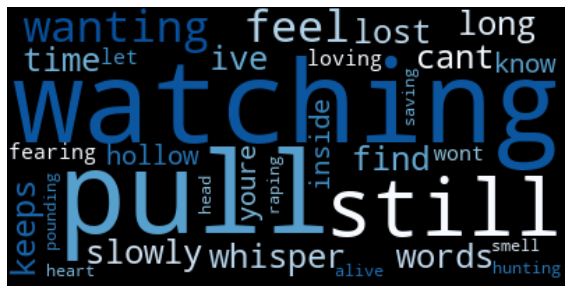

In [160]:
evanescence_word_cloud = WordCloud(max_words=200, background_color="black",stopwords=STOPWORDS, random_state=123, 
                                   colormap='Blues').generate(df_evanescence_merged.lyrics_clean[0])
plt.figure(figsize=(10, 10))
plt.imshow(evanescence_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

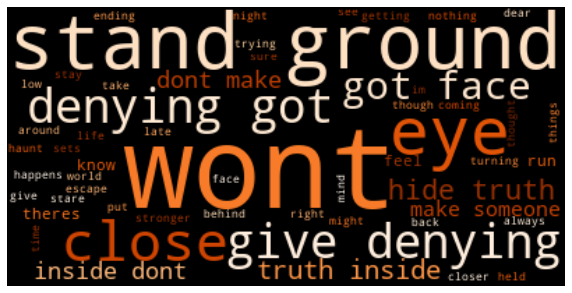

In [161]:
within_temptation_word_cloud = WordCloud(max_words=200, background_color="black",stopwords=STOPWORDS, random_state=123, 
                                   colormap='Oranges').generate(df_within_temptation_merged.lyrics_clean[0])
plt.figure(figsize=(10, 10))
plt.imshow(within_temptation_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**CONTINUE...**

# **Sentiment Analysis**